# Doğrusal Olmayan Regresyon Modelleri

In [181]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [182]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [183]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [184]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model & Tahmin

In [185]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [186]:
knn_model

KNeighborsRegressor()

In [187]:
knn_model.n_neighbors # komşu sayısına ulaşabiliyoruz

5

In [188]:
knn_model.metric

'minkowski'

In [189]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_s

#### Tahmin

In [190]:
y_pred = knn_model.predict(X_test)

In [191]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

#### Model Tuning

In [192]:
knn_model

KNeighborsRegressor()

In [193]:
range(10)   #0 dan 10 a kadar olan sayılar

range(0, 10)

In [194]:
# komşu sayımızın farklı değerler aldığında ortaya nasıl durumlar çıkacağına bakmak istersek 

In [195]:
RMSE = []

for k in range(10):
    k = k+1   #komşu sayısı arttıkça 
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)  
    print("k=",k,"için RMSE değer:",rmse)

k= 1 için RMSE değer: 455.03925390751965
k= 2 için RMSE değer: 415.99629571490965
k= 3 için RMSE değer: 420.6765370082348
k= 4 için RMSE değer: 428.8564674588792
k= 5 için RMSE değer: 426.6570764525201
k= 6 için RMSE değer: 423.5071669008732
k= 7 için RMSE değer: 414.9361222421057
k= 8 için RMSE değer: 413.7094731463598
k= 9 için RMSE değer: 417.84419990871265
k= 10 için RMSE değer: 421.6252180741266


In [196]:
# GridSearchCV  #üstteki yöntemin daha kısa hali

In [197]:
params = {"n_neighbors":np.arange(1,30,1)}

In [198]:
knn_model = KNeighborsRegressor()

In [199]:
knn_model_cv = GridSearchCV(knn_model,params,cv = 10).fit(X_train,y_train)

In [200]:
knn_model_cv.best_params_

{'n_neighbors': 8}

In [201]:
# final model
knn_tuned = KNeighborsRegressor(n_neighbors =knn_model_cv.best_params_["n_neighbors"]).fit(X_train,y_train)

In [202]:
y_pred = knn_tuned.predict(X_test)

In [203]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek Vektör Regresyonu (Support Vector Regression)

In [204]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [205]:
svr_model = SVR(kernel = "linear").fit(X_train,y_train) # modeli kurduk

In [206]:
svr_model

SVR(kernel='linear')

In [207]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [208]:
svr_model.predict(X_test)[0:10]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421, 272.22606175, 549.4423224 , 446.55264396,
       892.8309562 , 677.96856008])

In [209]:
svr_model.intercept_

array([-80.15196063])

In [210]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [211]:
# test

y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

## Model Tuning

In [212]:
svr_model = SVR()

In [213]:
svr_params = {"C" : [0.1,0.5,1,3]}

In [214]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv = 5).fit(X_train,y_train)

In [215]:
svr_cv_model.best_params_

{'C': 3}

In [216]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv = 5,verbose = 2,n_jobs = -1).fit(X_train,y_train)# verbose = çalışma esnasındaki durumu raporlar , njobs : bilgisayarda var olan işlemci gücünü max performans ile çalıştırır 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [217]:
svr_tuned = SVR(C = 3).fit(X_train,y_train)

In [218]:
y_pred = svr_tuned.predict(X_test)

In [219]:
np.sqrt(mean_squared_error(y_test,y_pred))

446.7237006897129

# Yapay Sinir Ağları

In [220]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [221]:
# diğer bölümlerden farklı olarak standartlaştırma işlemleri gerçekleştireceğiz,bazı algoritmalar heterojen veri setlerinde iyi çalışırken bazı algoritmalar homojen veri setleri üzerinde daha iyi çalışır,yapay sinir ağları homojen veri setleri üzerinde daha iyi çalışır

In [222]:
scaler = StandardScaler()  #nesne oluşturduk

In [223]:
scaler.fit(X_train)# standartlaştırma işlemine tabi tutuyoruz  scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [224]:
X_test_scaled = scaler.transform(X_test)

In [225]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [226]:
mlp_model

MLPRegressor()

In [227]:
mlp_model.predict(X_test_scaled)[0:5]

array([20.16922649, 39.7673236 , 68.71612828, 13.08723314, 33.75010793])

In [228]:
np.sqrt(mean_squared_error(y_test,y_pred))

446.7237006897129

## Model Tuning

In [229]:
mlp_params = {"alpha" : [0.1,0.01,0.02,0.001,0.0001],   # alpha lar lamda değerleri yani ceza parametreleri
              "hidden_layer_sizes" : [(10,20),(5,5),(100,100)]}      # girdiğimiz değer kadar katman girdiğimiz değerler kadar hücre oluşuyor (10,2) 2 katman var katmanların içindeki nöron sayısı 10 ve 2

In [230]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv = 10, verbose = 2,n_jobs = -1).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [231]:
mlp_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [232]:
# final 
mlp_tuned = MLPRegressor(alpha = 0.001,hidden_layer_sizes =(100,100)).fit(X_train_scaled,y_train)

In [233]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [234]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.6130455517902

# CART (Classification and Regression Tree)

In [235]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [236]:
X_train = pd.DataFrame(X_train["Hits"])  # hits isimli değişkenleri aldık
X_test = pd.DataFrame(X_test["Hits"])

## Model & Tahmin

In [237]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3).fit(X_train,y_train)#max yaprak sayısını 3 olarak belirledik bu yüzden grafiğimizi etkiledi

In [238]:
# eksenlerde nasıl görselleştirebileceğimize bakmak istersek

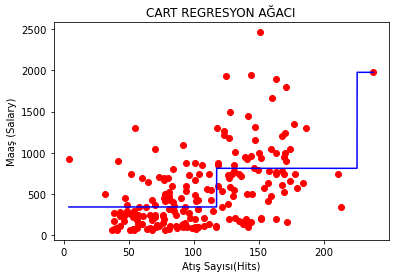

In [239]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
plt.scatter(X_train, y_train, color = 'red') 
  
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  

plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [240]:
# tek degiskenli tahmin

In [241]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

460.0663148428844

In [242]:
# tum degiskenli tahmin

In [243]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [244]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [245]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

534.4417741255398

In [246]:
# burdan çıkarabileceğimiz sonuç : seçmiş oldugumuz tek değişkenin oldukça yüksek açıklanabilirlik sağladığı,diğer sonuç ise yeni değişkenler ekledikçe daha başarılı tahminler yapılabilmektedir.

In [247]:
cart_model

DecisionTreeRegressor()

In [248]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\aleyna\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) 

## Model Tuning

In [249]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [250]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [251]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv = 10).fit(X_train,y_train)

In [252]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [253]:
#final model

In [254]:
cart_tuned =  DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [255]:
y_pred = cart_tuned.predict(X_test)

In [256]:
np.sqrt(mean_squared_error(y_test,y_pred))

411.9886403043614

# Random Forests

In [257]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [258]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train,y_train)

In [259]:
rf_model

RandomForestRegressor(random_state=42)

In [260]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

## Model Tuning

In [261]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train,y_train)

In [262]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

In [263]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 5,n_jobs = -1,verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [264]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [265]:
rf_tuned = RandomForestRegressor(random_state = 42, 
                                 max_depth = 10,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 2000).fit(X_train,y_train)

y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

346.2399166825381

## Değişken Önem Düzeyi

In [266]:
# değişkenlerin hangisinin daha önemli olduğuna karar veriyoruz

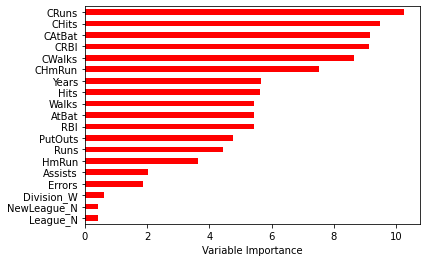

In [267]:
Importance = pd.DataFrame({'Importance' : rf_tuned.feature_importances_*100},
                          index = X_train.columns)
Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',  # ascending -> artan sıraya göre
                                             color = 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

                       

# Gradient Boosting Machines

In [268]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                   test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [269]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [270]:
gbm_model

GradientBoostingRegressor()

In [271]:
y_pred = gbm_model.predict(X_test)

In [272]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.27659480363906

## Model Tuning

In [273]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [274]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\aleyna\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regression and is a robust loss function. 'huber' is a
    combination of the two. 'quantile' allows quantile regression (use
    `alpha` to specify the quantile).

    .. deprecated:: 1.0
        The loss 'ls' wa

In [275]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [276]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [277]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [326]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,
                                     loss = "lad",
                                     max_depth = 3,
                                     n_estimators = 500,
                                     subsample = 0.5).fit(X_train, y_train)

In [327]:
y_pred = gbm_tuned.predict(X_test)

In [328]:
np.sqrt(mean_squared_error(y_test, y_pred))

324.1521456200402

In [281]:
#degisken onem duzeyleri

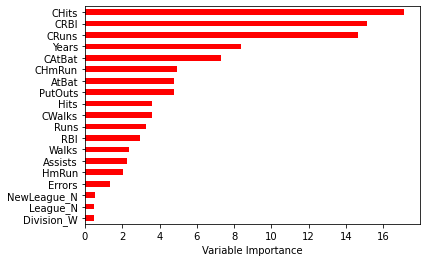

In [282]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [283]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [284]:
!pip install xgboost

In [285]:
import xgboost

In [286]:
from xgboost import XGBRegressor

In [287]:
xgb = XGBRegressor().fit(X_train, y_train)

In [288]:
y_pred = xgb.predict(X_test)

In [289]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [290]:
xgb_model = XGBRegressor()


In [291]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [292]:
xgb_cv_model  = GridSearchCV(xgb_model,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [293]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [294]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 1000).fit(X_train, y_train)


In [295]:
y_pred = xgb_tuned.predict(X_test)

In [296]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.8515299923177

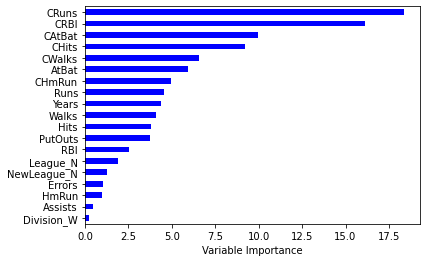

In [297]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'b', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# LightGBM

In [298]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [299]:
!pip install lightgbm

In [300]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [301]:
from lightgbm import LGBMRegressor

## Model & Tahmin

In [302]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [303]:
y_pred = lgb_model.predict(X_test)

In [304]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [305]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor()

In [306]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [307]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [308]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [309]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 6, 
                          n_estimators = 20).fit(X_train, y_train)

In [310]:
y_pred = lgbm_tuned.predict(X_test)

In [311]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

# CatBoost

In [312]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [313]:
!pip install catboost

## Model & Tahmin

In [314]:
from catboost import CatBoostRegressor

In [315]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 16.8ms	remaining: 16.7s
1:	learn: 431.3923642	total: 17.7ms	remaining: 8.81s
2:	learn: 424.8820360	total: 18.5ms	remaining: 6.14s
3:	learn: 418.2514904	total: 19.4ms	remaining: 4.82s
4:	learn: 412.6394021	total: 20.2ms	remaining: 4.01s
5:	learn: 406.6247020	total: 21ms	remaining: 3.48s
6:	learn: 400.5321206	total: 21.8ms	remaining: 3.09s
7:	learn: 394.6683437	total: 22.6ms	remaining: 2.8s
8:	learn: 388.2496484	total: 23.4ms	remaining: 2.57s
9:	learn: 382.9448842	total: 24.1ms	remaining: 2.39s
10:	learn: 377.2600080	total: 24.8ms	remaining: 2.23s
11:	learn: 372.4829606	total: 25.5ms	remaining: 2.1s
12:	learn: 366.6823437	total: 26.2ms	remaining: 1.99s
13:	learn: 362.6076230	total: 26.9ms	remaining: 1.9s
14:	learn: 358.0107745	total: 27.6ms	remaining: 1.81s
15:	learn: 353.2802665	total: 28.4ms	remaining: 1.74s
16:	learn: 348.5646265	total: 29.1ms	remaining: 1.68s
17:	learn: 343.6407912	total: 29.8ms	remaining: 1.63s
18:	learn: 33

In [316]:
dir(catb_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_base_virtual_ensembles_predict',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_compatible_loss',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_default_prediction_type',
 '_get_embedding_feature_indices',
 '_get_float_feature_indices',
 '_get_nan_treatments',
 '_get_params',
 '_get_tags',
 '_get_text_feature

In [317]:
y_pred = catb_model.predict(X_test)

In [318]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [319]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [320]:
catb_model = CatBoostRegressor()

In [321]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 1.55ms	remaining: 308ms
1:	learn: 404.8723520	total: 2.05ms	remaining: 203ms
2:	learn: 387.4057666	total: 2.39ms	remaining: 157ms
3:	learn: 372.2801584	total: 2.74ms	remaining: 134ms
4:	learn: 358.9204229	total: 3.09ms	remaining: 120ms
5:	learn: 347.0083933	total: 3.43ms	remaining: 111ms
6:	learn: 336.0130818	total: 3.76ms	remaining: 104ms
7:	learn: 324.3923300	total: 4.1ms	remaining: 98.4ms
8:	learn: 314.8690957	total: 4.51ms	remaining: 95.6ms
9:	learn: 308.5075563	total: 4.89ms	remaining: 92.9ms
10:	learn: 298.8587285	total: 5.26ms	remaining: 90.5ms
11:	learn: 294.7655438	total: 5.66ms	remaining: 88.6ms
12:	learn: 288.0697862	total: 5.99ms	remaining: 86.2ms
13:	learn: 282.6697154	total: 6.33ms	remaining: 84ms
14:	learn: 277.6121667	total: 6.69ms	remaining: 82.5ms
15:	learn: 273.4383979	total: 7.04ms	remaining: 81ms
16:	learn: 269.1556201	total: 7.38ms	remaining: 79.5ms
17:	learn: 264.8098704	tot

In [322]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [323]:
catb_tuned = CatBoostRegressor(depth = 3, iterations = 500, learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 425.7900818	total: 32.6ms	remaining: 16.3s
1:	learn: 404.8723520	total: 33.5ms	remaining: 8.35s
2:	learn: 387.4057666	total: 34ms	remaining: 5.63s
3:	learn: 372.2801584	total: 34.4ms	remaining: 4.27s
4:	learn: 358.9204229	total: 34.8ms	remaining: 3.45s
5:	learn: 347.0083933	total: 35.2ms	remaining: 2.9s
6:	learn: 336.0130818	total: 35.7ms	remaining: 2.51s
7:	learn: 324.3923300	total: 36ms	remaining: 2.22s
8:	learn: 314.8690957	total: 36.5ms	remaining: 1.99s
9:	learn: 308.5075563	total: 36.8ms	remaining: 1.8s
10:	learn: 298.8587285	total: 37.2ms	remaining: 1.65s
11:	learn: 294.7655438	total: 37.6ms	remaining: 1.53s
12:	learn: 288.0697862	total: 37.9ms	remaining: 1.42s
13:	learn: 282.6697154	total: 38.3ms	remaining: 1.33s
14:	learn: 277.6121667	total: 38.6ms	remaining: 1.25s
15:	learn: 273.4383979	total: 38.9ms	remaining: 1.18s
16:	learn: 269.1556201	total: 39.3ms	remaining: 1.12s
17:	learn: 264.8098704	total: 39.7ms	remaining: 1.06s
18:	learn: 261.6700768	total: 40ms	remaining

In [324]:
y_pred = catb_tuned.predict(X_test)

In [325]:
np.sqrt(mean_squared_error(y_test, y_pred))

336.40041748521486

# MAKINE OGRENMESI GOREVLERININ OTOMATIKLESTIRILMESI

In [1]:
#yukarıda tekrar edilen tüm olayları tek bir fonksiyonda yazıp otomatikleştirme işlemimizi yapıyoruz

In [228]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [317]:
def compML(df, y, alg):
    #train-test ayrimi
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:",RMSE)

In [318]:
compML(df, "Salary", SVR)

SVR Modeli Test Hatası: 473.4445984431814


In [283]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [320]:
for i in models:
    compML(df, "Salary", i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[13:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 349.7674420565306
RandomForestRegressor Modeli Test Hatası: 351.39463394426684
DecisionTreeRegressor Modeli Test Hatası: 519.1159209070132
MLPRegressor Modeli Test Hatası: 465.65322522489663
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 473.4445984431814
